# # データ構造化ハンズオン演習　7
## TEM/STEM編 



**対応機種** ：　 FEI，日本電子　（TEM，STEM）  
**rawデータ**：　.dm3 .dm4ファイル　（Gatanフォーマット）  
**スクリプトの内容**：  
撮影したrawファイルであるGatanフォーマット（.dm3/.dm4）を登録すると，画像ファイルを任意の画像フォーマット(例.png)へ変換するとともに，ファイル内部にあるメタデータを抽出し，撮影情報をリスト化するデータ構造化のスクリプトを出力します．

**想定利用**：  ユーザーは主にTEM撮像のみを目的としたライトユーザーです ．想定ケースとしてはDigitalMicrograh(dm4)ファイルのほか，EELSやEDXのアノテーションなどが描かれている画像ファイル（png/tiff）を添えてデータを登録することを目的します．ユーザーが報告書などで使いやすいように必要となる撮影情報（メタデータ）をあわせて出力します．

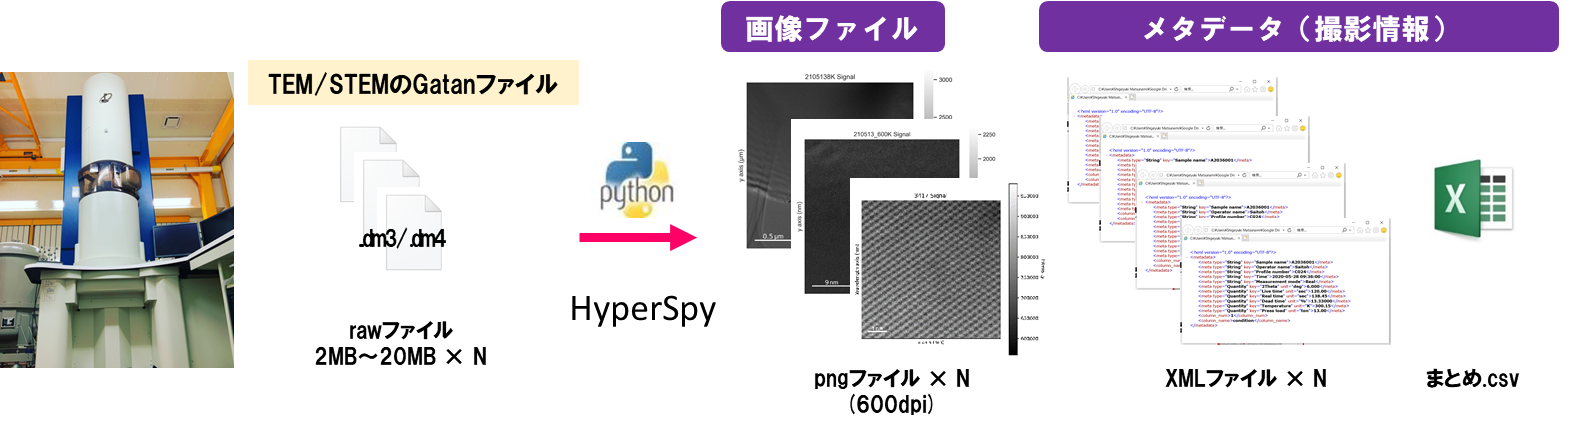

## サンプルデータを読み込みましょう

In [1]:
!git clone https://github.com/ARIM-Training/Training_Program_7.git
%cd Training_Program_7

C:\Users\Shigeyuki Matsunami\Dropbox\4_データ設計\1_データ構造化\Github\Training_Program_7\Training_Program_7


Cloning into 'Training_Program_7'...


これで準備が整いました．

## 1. ライブラリーを読み込みましょう
Gatanフォーマットを読み込むために必要なライブラリーをimportします．TEMのデータ処理は，``hyperspy``(https://hyperspy.org/) という多次元データ専用ライブラリを使います．

 * TEM処理用: ``HyperSpy``
 * 数値処理用: ``numpy``
 * 可視化用: ``matplotlib``  
 
なおGoogle Colabでの動作では``hyperspy``ライブラリをpip installする必要があります．その時は，下記のコメントアウトしている行を実行してください．

In [6]:
#標準ライブラリ
import os

# TEM処理用　
!pip install hyperspy
import hyperspy.api as hs

# 数値処理用
import numpy as np
import pandas as pd

# 可視化
from matplotlib import pyplot as plt

また，出力結果を「output」フォルダーに保存するため，そのフォルダーの作成をします．

In [7]:
output_folder = 'output'
os.makedirs(output_folder,exist_ok = True)

# 2. HyperSpyの基本動作
**HyperSpy**はTEMの検出器メーカーGatanのDigital Micrographのファイル形式である.dm3, .dm4が読み込めます．  

なお，HyperSpyで対応しているファイルフォーマットはこちらになります．  
http://hyperspy.org/hyperspy-doc/current/user_guide/io.html#supported-formats

## 2.1.ファイルの読み込み
**HyperSpy**ではファイルの読み込みは``load``モジュールからファイル名を指定します．この操作を実行すると画像データやメタデータがオブジェクト化されます．
次の例ではオブジェクト変数として「data」とした例です．

http://hyperspy.org/hyperspy-doc/current/user_guide/getting_started.html#loading-data

In [9]:
file = 'data/Si_110.dm4'
data = hs.load(file)

In [10]:
data

<Signal2D, title: 3417, dimensions: (|512, 512)>

## 2.2.ファイルの可視化
可視化（画像出力）はplotモジュールで行います．**HyperSpy**ではタイトルやスケールバー表示，および強度バーが自動的に描かれます．

http://hyperspy.org/hyperspy-doc/current/user_guide/visualisation.html

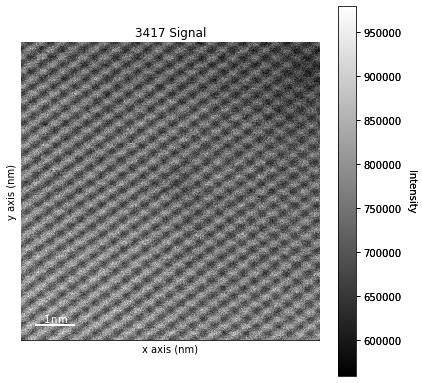

In [11]:
data.plot()

## 2.3. 画像の保存方法１　（HyperSpyのsaveモジュール）
HyperSpyの標準の画像保存を行う場合にはunit32からunit8への変換が行われ，真っ黒な画像として保存されることに留意が必要です．

http://hyperspy.org/hyperspy-doc/current/user_guide/getting_started.html#saving-files

In [12]:
data.save('output/test.png')

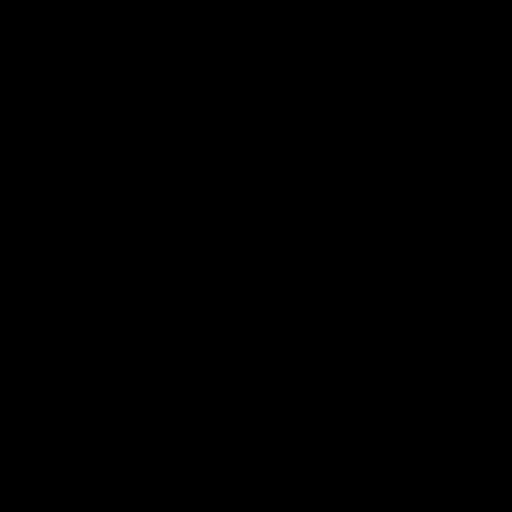

このような潰れを回避するためには，floatへの変換を行ったのちにsaveを実行します．

http://hyperspy.org/hyperspy-doc/current/user_guide/signal.html#changing-the-data-type

In [13]:
data.change_dtype('float32')
data.save('output/test_2.png')

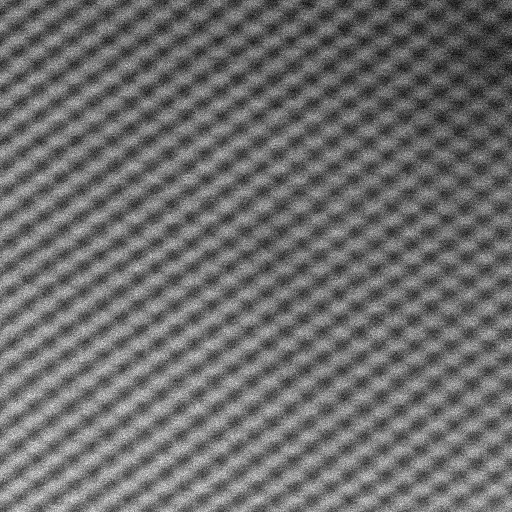

## 2.4. 画像の保存方法２　（Matplotlibのsavefigモジュール）
**HyperSpy**の``save``モジュールではスケールバーなどが全て消失してしまいます．もし，スケールなどをそのままに保存したい場合には**Matplotlib**の``savefig``モジュールを使うと出力画像がそのままにsaveできます．  
ここではoutputフォルダーに「Si_110_ex1.png」とpngとして変換して保存する例です．

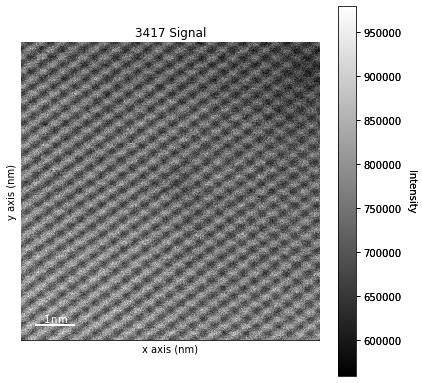

In [14]:
data.plot()
plt.savefig('output/Si_110_ex1.png') 

このことからも画像の処理は**matplotlib**のコマンドで操作することができます．  
次の例は**matplotlib**の``imshow``モジュールで表示させる最も簡単な例です．

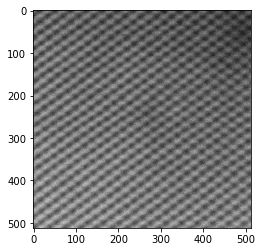

In [15]:
fig, ax = plt.subplots()
ax.imshow(data, cmap="gray")

画像の保存についても，``savefig``モジュールを使うと出力画像がそのままにsaveできます． 

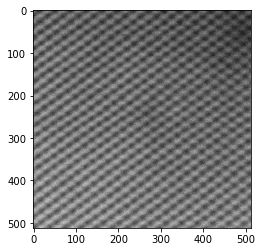

In [16]:
fig, ax = plt.subplots()
ax.imshow(data, cmap="gray")

plt.savefig('output/Si_110_ex2.jpg') 

## 2.5. FFTの方法

画像のFFTはfftモジュールで行うことができます．加えてplotモジュールでTrueを指定するとFFTのパワースペクトルとして表示されます．デフォルトでは強度はlogスケールです．  
http://hyperspy.org/hyperspy-doc/current/user_guide/signal.html#fast-fourier-transform-fft

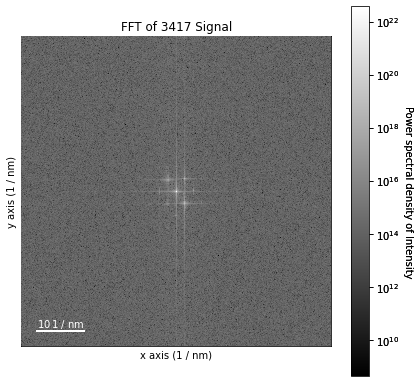

In [17]:
fft_fig = data.fft(True)
fft_fig.plot(True)
plt.savefig('output/Si_110_ex3.png') 

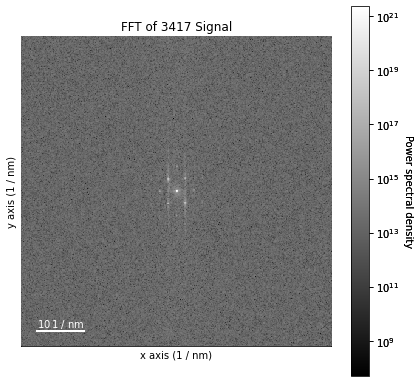

In [18]:
fft_fig2 = data.fft(True,apodization=True)
fft_fig2.plot(True)
plt.savefig('output/Si_110_ex4.png') 

## 3.1 メタデータ（HyperSpy様式）

**HyperSpy**ではHyperSpy様式のmetadata出力とGatan様式のmetadeta出力をする二通りの方法があります．
HyperSpy様式は``metadata``モジュールで出力することができます．

In [19]:
meta = data.metadata
meta

├── Acquisition_instrument
│   └── TEM
│       ├── Stage
│       │   ├── tilt_alpha = 20.90999984741211
│       │   ├── tilt_beta = 0.019999999552965164
│       │   ├── x = -0.0368036015625
│       │   ├── y = -0.0032318999023437504
│       │   └── z = 0.0546906015625
│       ├── acquisition_mode = STEM
│       ├── beam_current = 10.0
│       ├── beam_energy = 200.0
│       ├── camera_length = 20.0
│       ├── dwell_time = 3.2e-05
│       ├── magnification = 25000000.0
│       └── microscope = JEM-ARM200F
├── General
│   ├── authors = Kyoto University
│   ├── date = 2021-04-09
│   ├── original_filename = Si_110.dm4
│   ├── time = 15:29:42
│   └── title = 3417
└── Signal
    ├── Noise_properties
    │   └── Variance_linear_model
    │       ├── gain_factor = 1.0
    │       └── gain_offset = 0.0
    ├── binned = False
    └── signal_type =

上記を辞書配列として表示や処理をする場合には，``as_dictionary``メソッドが使えます．

In [20]:
meta = data.metadata.as_dictionary()
meta

{'_HyperSpy': {'Folding': {'unfolded': False,
   'signal_unfolded': False,
   'original_shape': None,
   'original_axes_manager': None}},
 'General': {'title': '3417',
  'original_filename': 'Si_110.dm4',
  'date': '2021-04-09',
  'time': '15:29:42',
  'authors': 'Kyoto University'},
 'Signal': {'binned': False,
  'signal_type': '',
  'Noise_properties': {'Variance_linear_model': {'gain_factor': 1.0,
    'gain_offset': 0.0}}},
 'Acquisition_instrument': {'TEM': {'beam_energy': 200.0,
   'Stage': {'tilt_alpha': 20.90999984741211,
    'tilt_beta': 0.019999999552965164,
    'x': -0.0368036015625,
    'y': -0.0032318999023437504,
    'z': 0.0546906015625},
   'acquisition_mode': 'STEM',
   'beam_current': 10.0,
   'camera_length': 20.0,
   'magnification': 25000000.0,
   'microscope': 'JEM-ARM200F',
   'dwell_time': 3.2e-05}}}

In [21]:
def get_dm_metadata (file):

    data = hs.load(file)
    meta_main = data.metadata.as_dictionary()
    
    para = ['General', 'Signal', 'Acquisition_instrument']
    _dict = {}   
    

    for key_parent in para:
        if key_parent =='Acquisition_instrument':
            for key, val in meta_main['Acquisition_instrument']['TEM'].items():
                _dict[key] = val             
                
        else:
            for key, val in meta_main[key_parent].items():

                _dict[key] = val

    return _dict

In [22]:
main = get_dm_metadata (file)
main

{'title': '3417',
 'original_filename': 'Si_110.dm4',
 'date': '2021-04-09',
 'time': '15:29:42',
 'authors': 'Kyoto University',
 'binned': False,
 'signal_type': '',
 'quantity': 'Intensity',
 'Noise_properties': {'Variance_linear_model': {'gain_factor': 1.0,
   'gain_offset': 0.0}},
 'beam_energy': 200.0,
 'Stage': {'tilt_alpha': 20.90999984741211,
  'tilt_beta': 0.019999999552965164,
  'x': -0.0368036015625,
  'y': -0.0032318999023437504,
  'z': 0.0546906015625},
 'acquisition_mode': 'STEM',
 'beam_current': 10.0,
 'camera_length': 20.0,
 'magnification': 25000000.0,
 'microscope': 'JEM-ARM200F',
 'dwell_time': 3.2e-05}

## 3.2. メタデータ（Gatan様式）
Gatanの標準メタデータについては，original_metadataモジュールで取得することができます．

In [23]:
meta_original = data.original_metadata.as_dictionary()
meta_original

{'root': {},
 'ApplicationBounds': (0, 0, 1013, 1784),
 'DocumentObjectList': {'TagGroup0': {'AnnotationGroupList': {'TagGroup0': {'AnnotationType': 31,
     'BackgroundColor': (-1, -1, -1),
     'BackgroundMode': 2,
     'FillMode': 2,
     'Font': {'Attributes': 7, 'FamilyName': 'Calibri', 'Size': 20},
     'ForegroundColor': (-1, -1, -1),
     'HasBackground': 0,
     'IsMoveable': 1,
     'IsResizable': 1,
     'IsSelectable': 1,
     'IsTransferrable': 1,
     'IsTranslatable': 1,
     'IsVisible': 1,
     'ObjectTags': {},
     'Rectangle': (452.0, 32.0, 480.0, 176.0),
     'RestrictionStyle': 0,
     'TextOffsetH': 1.0,
     'TextOffsetV': 1.0,
     'TextWidth': 40.959999084472656,
     'UniqueID': 27}},
   'AnnotationType': 20,
   'BackgroundColor': (-1, -1, 0),
   'BackgroundMode': 2,
   'FillMode': 1,
   'ForegroundColor': (0, 0, -1),
   'HasBackground': 0,
   'ImageDisplayInfo': {'BrightColor': (-1, -1, -1),
    'Brightness': 0.5,
    'CaptionOn': 0,
    'CaptionSize': 10,
 

抽出すべきパラメータはImageListの項目である場合には，リスト配置のルールで取り出すことができます．

In [24]:
meta_original['ImageList']['TagGroup0']['ImageTags']

{'DataBar': {'Acquisition Date': '4/9/2021',
  'Acquisition Time': '3:29:42 PM',
  'Acquisition Time (OS)': 1.3262423382872552e+17,
  'Device Name': 'DigiScan',
  'Exposure Number': 2458378,
  'Signal Name': 'ADF'},
 'DigiScan': {'Bitshift': 0,
  'Channel': 1,
  'Flip': 0,
  'Flyback': 500.0,
  'Horizontal DS Offset': 0.0,
  'Horizontal Image Center': 256.0,
  'Horizontal Perpendicular Pixel Step': 44,
  'Horizontal Pixel Step': -9,
  'Horizontal Spacing': 44.8,
  'Image Height': 512,
  'Image Width': 512,
  'Integrate Frames': 0,
  'Integration Percentage': 80.0,
  'Number Summing Frames': 1.0,
  'Recorded': 1,
  'Rotation': 282.02593850846506,
  'Rotation Offset': 180.0,
  'Sample Time': 32.0,
  'SessionID': 1616982126,
  'Signal Index': 1,
  'Signals': {'TagGroup0': {'Acquired': 0,
    'Datatype': 4,
    'Selected': 0,
    'Signal ID': 0},
   'TagGroup1': {'Acquired': 1, 'Datatype': 4, 'Selected': 1, 'Signal ID': 1},
   'TagGroup2': {'Acquired': 0, 'Datatype': 4, 'Selected': 0, 'Sig

In [25]:
def get_dm_metadata_original (file):

    data = hs.load(file)
    meta_original = data.original_metadata.as_dictionary()
    
    para = ['DocumentObjectList','ImageList']
    _dict = {}   
    
    for key_parent in para:
        if key_parent =='DocumentObjectList':
            pass
            #for key, val in meta_original['DocumentObjectList']['TagGroup0']['AnnotationGroupList']['TagGroup0'].items():
                #_dict[key] = val             
                
        elif key_parent =='ImageList':
                                
            for key, val in meta_original['ImageList']['TagGroup0']['ImageTags']['DataBar'].items():
                
                _dict[key] = val
                
                                
            for key, val in meta_original['ImageList']['TagGroup0']['ImageTags']['DigiScan'].items():
                
                _dict[key] = val
                
            for key, val in meta_original['ImageList']['TagGroup0']['ImageTags']['Meta Data'].items():
                
                _dict[key] = val

            for key, val in meta_original['ImageList']['TagGroup0']['ImageTags']['Microscope Info'].items():
                
                _dict[key] = val
                

    return _dict

In [26]:
original = get_dm_metadata_original (file)
original

{'Acquisition Date': '4/9/2021',
 'Acquisition Time': '3:29:42 PM',
 'Acquisition Time (OS)': 1.3262423382872552e+17,
 'Device Name': 'DigiScan',
 'Exposure Number': 2458378,
 'Signal Name': 'ADF',
 'Bitshift': 0,
 'Channel': 1,
 'Flip': 0,
 'Flyback': 500.0,
 'Horizontal DS Offset': 0.0,
 'Horizontal Image Center': 256.0,
 'Horizontal Perpendicular Pixel Step': 44,
 'Horizontal Pixel Step': -9,
 'Horizontal Spacing': 44.8,
 'Image Height': 512,
 'Image Width': 512,
 'Integrate Frames': 0,
 'Integration Percentage': 80.0,
 'Number Summing Frames': 1.0,
 'Recorded': 1,
 'Rotation': 282.02593850846506,
 'Rotation Offset': 180.0,
 'Sample Time': 32.0,
 'SessionID': 1616982126,
 'Signal Index': 1,
 'Signals': {'TagGroup0': {'Acquired': 0,
   'Datatype': 4,
   'Selected': 0,
   'Signal ID': 0},
  'TagGroup1': {'Acquired': 1, 'Datatype': 4, 'Selected': 1, 'Signal ID': 1},
  'TagGroup2': {'Acquired': 0, 'Datatype': 4, 'Selected': 0, 'Signal ID': 2},
  'TagGroup3': {'Acquired': 0, 'Datatype': 

## おわりに
上記はGatanファイルから画像データの出力やメタデータを選定するためにHyperSpyを使ったデータ構造化の事例となります．

* Gatanフォーマット（.dm3/ .dm4）を読み込む
* デフォルトでの画像表示を行い，その保存を行う．自分でカスタム化したい場合にはmatplotlibを使う
* 必要なメタデータを読み出す．抽出についてはTraining_Program2と同じようにして行うことができる．

